In [1]:
#sift PATENTADO HAY Q PAGAR

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:



def divisionesDeLaImagen(img1):
    df= pd.DataFrame()
    
    alto=img1.shape[0]
    ancho=img1.shape[1]
    alto,ancho
    partevertical=int(alto/3)
    partehorizontal=int(ancho/3)


    v1=0 #inicio

    h1=0 #inicio
    contador=0
    for cortevertical in range(3):  
        v1=v1
        v2=v1+(partevertical)

        h1=0 
        for cortehorizontal in range(3):

            h1=h1
            h2=h1+(partehorizontal)
            df[str(contador)]=(v1,v2,h1,h2)
            
            
            h1=h2
            contador+=1
        v1=v2 
    return df


In [5]:
##################################################

#A falta de chequear con otras fotografias, la precision de 35 no da falsos positivos

#la posicion de las features se imprime la posicion x,y de la fotografia original (linea 42) 
#tb se puede imprimir la de la segunda foto para poder calcular la matriz de translacion

#si son demasiados calculos, se podrian ir haciendo cuadrantes hasta tener 3 puntos y parar.

def extractFeatures(img1, img2, precision=35):
    
    alto=img1.shape[0]
    ancho=img1.shape[1]
    alto,ancho
    partevertical=int(alto/3)
    partehorizontal=int(ancho/3)
    
    
    contador=0
    for cuadrante in range(9):
        L=divisionesDeLaImagen(img1)[str(cuadrante)].to_list()

        v1,v2,h1,h2=L

        crop1 = img1[v1:v2,h1:h2]

        crop2 = img2[v1:v2,h1:h2]

        orb = cv2.ORB_create()#(nfeatures=200)
        #kp=sift.detect(img,None) #no mask
        keypoints1,descriptors1 = orb.detectAndCompute(crop1,None)
        keypoints2,descriptors2 = orb.detectAndCompute(crop2,None)

        if ((keypoints1 == 0)|(keypoints2== 0)):
            print("no hay")
            
        #brut force
        bf=cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) #crossCheck busca las merjores caracteristicas
        matches=bf.match(descriptors1,descriptors2)
        matches=sorted(matches,key=lambda x:x.distance) #los ordenamos de menor a mayor
        #print(len(matches)) #cuant menor la distancia hamming mejor, mas  parecidos son los referentes
        #recogemos solo los que tienen una distancia menor a 30 solo queremos estos

#la posicion de las features se imprime la posicion x,y de la fotografia original (linea 42) 
#tb se puede imprimir la de la segunda foto para poder calcular la matriz de translacion
#aqui en lugar de print podriamos hacer un df 

        cont=0
        for m in matches:
            if m.distance <precision:
                print(m.distance)
                img1idx=m.queryIdx
                posicion=keypoints1[img1idx].pt
                print(posicion)
                x=posicion[0]+h1
                y=posicion[1]+v1
                print(x,y)
                cont+=1
        #contador
        #ASI SOLO MOSTRAMOS LOS PUNTOS DE LOS QUE ESTAMOS MUY SEGUROS



        matching_result = cv2.drawMatches(crop1,keypoints1,crop2,keypoints2,matches[:cont], None,flags=2)#seleccionamos solo los 20 mejores 

        
        print (contador,v1,v2,h1,h2)
        
        
        fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
        plt.imshow(matching_result)
        
        print("#######################################")
        
        contador+=1
        
        ################################
        
      

22.0
(171.60000610351562, 114.00000762939453)
171.60000610351562 114.00000762939453
0 0 189 0 337
#######################################
1 0 189 337 674
#######################################
2 0 189 674 1011
#######################################
18.0
(176.25601196289062, 114.04801177978516)
176.25601196289062 303.04801177978516
26.0
(183.1680145263672, 108.864013671875)
183.1680145263672 297.864013671875
27.0
(176.2560272216797, 114.04801940917969)
176.2560272216797 303.0480194091797
27.0
(196.57733154296875, 104.50946807861328)
196.57733154296875 293.5094680786133
33.0
(181.64739990234375, 109.4861068725586)
181.64739990234375 298.4861068725586
34.0
(184.55043029785156, 72.57601165771484)
184.55043029785156 261.57601165771484
3 189 378 0 337
#######################################
4 189 378 337 674
#######################################
5 189 378 674 1011
#######################################
6 378 567 0 337
#######################################


error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/core/src/batch_distance.cpp:238: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == 5 || type == 0) in function 'batchDistance'


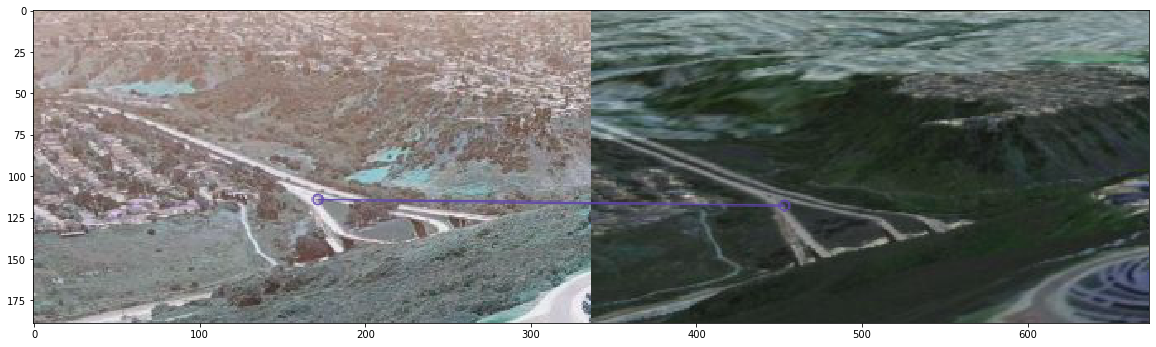

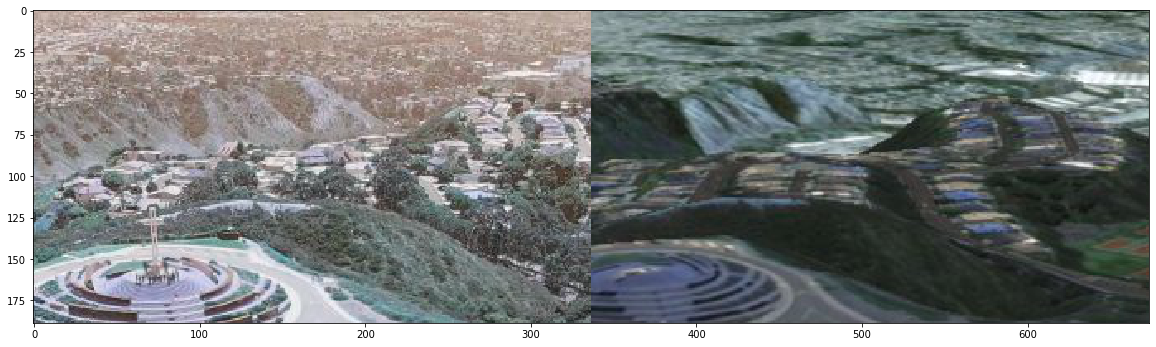

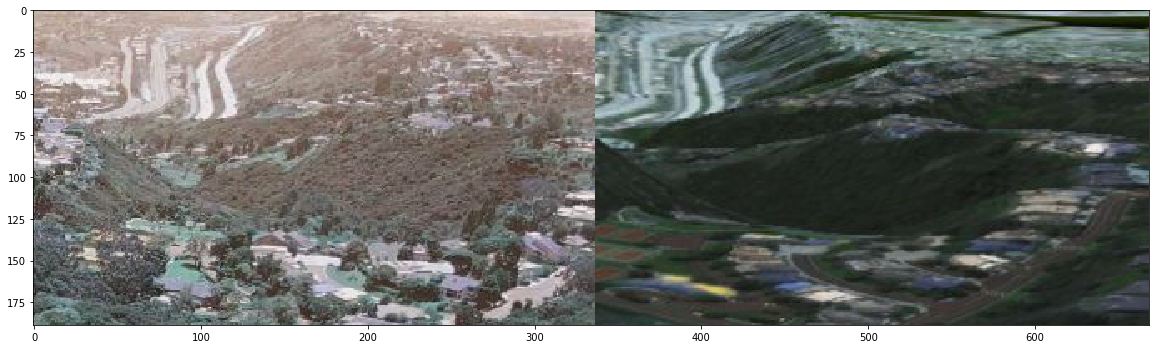

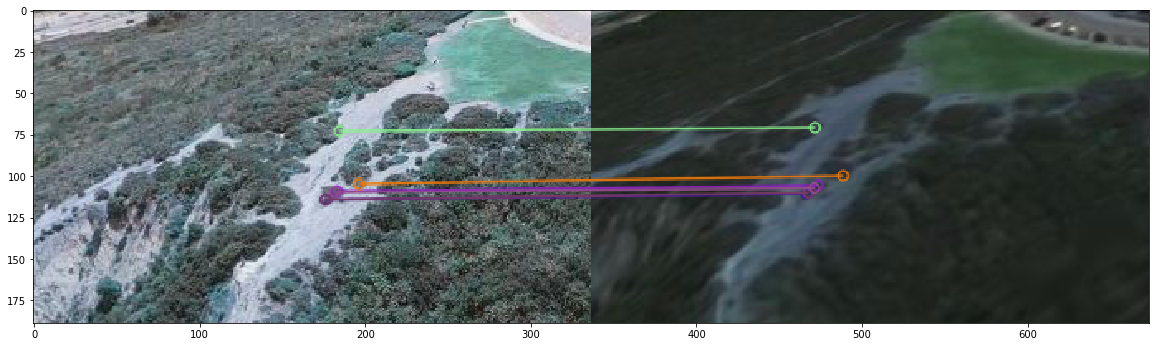

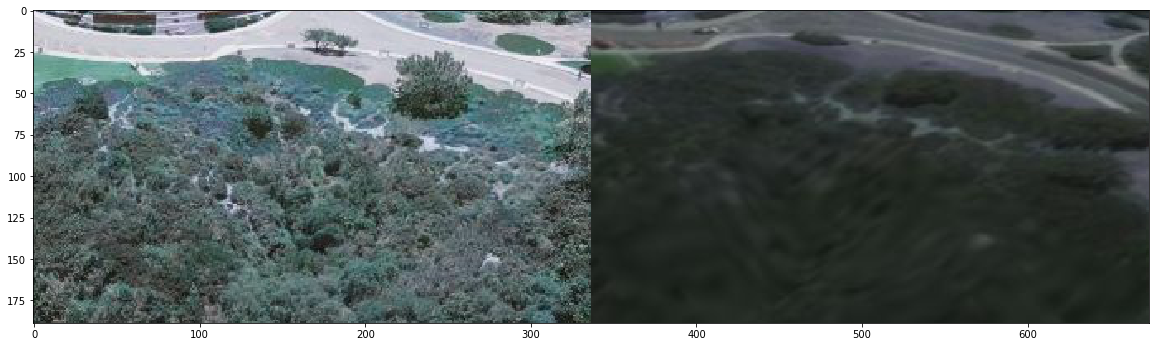

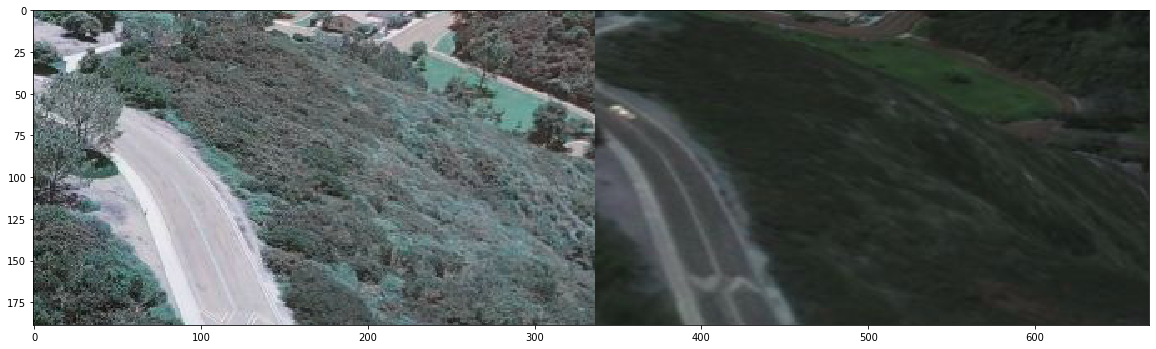

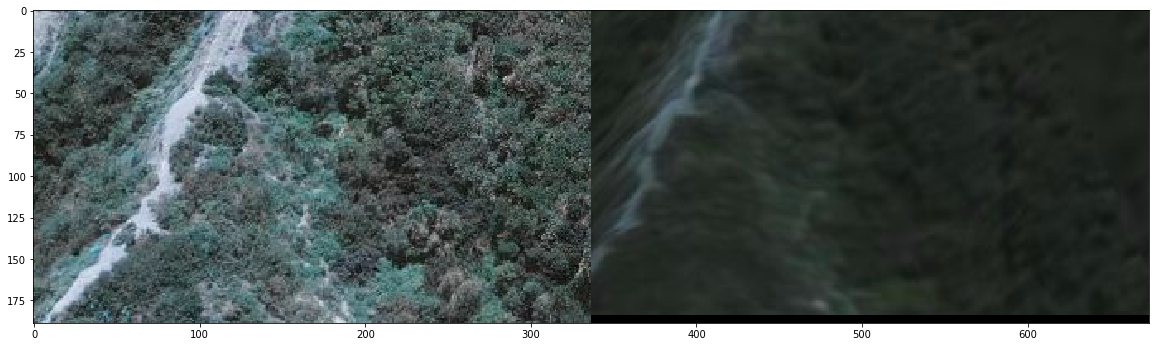

In [7]:
img1 = cv2.imread("dron.jpg")
img2 = cv2.imread("vr.jpg")
extractFeatures(img1, img2) 